In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [3]:
data = {
    'Area': [120, 145, 80, 160, 200, 90, 110, 130, 180, 160],
    'Valor': [300, 450, 550, 600, 350, 420, 550, 780, 360, 575],
    'Dist_praia': [15, 15, 8, 25, 12, 15, 22, 8, 5, 14],
}


In [4]:
imoveis_df = pd.DataFrame(data)

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imoveis_df)

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(scaled_data)

DBSCAN(min_samples=2)

In [7]:
labels = dbscan.labels_

In [8]:
imoveis_df['cluster'] = labels

In [9]:
mean_values = imoveis_df.groupby('cluster')['Valor'].mean()

In [10]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

Número de clusters encontrados: 0


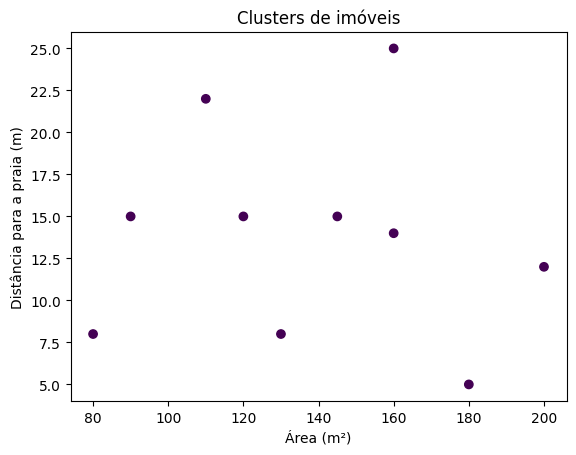

In [11]:
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'], c=imoveis_df['cluster'])
plt.xlabel('Área (m²)')
plt.ylabel('Distância para a praia (m)')
plt.title('Clusters de imóveis')
plt.show()
